# **Clustering based Course Recommender System**


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Load the user profile dataset


In [4]:
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"

# Using pandas' read_csv function to read the CSV file from the specified URL into a DataFrame
user_profile_df = pd.read_csv(user_profile_url)

# Displaying the first few rows of the DataFrame to inspect its contents
user_profile_df.head()


,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [5]:
user_profile_df.shape

(33901, 15)

In [6]:
feature_names = list(user_profile_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [7]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [8]:
scaler = StandardScaler()

# Standardizing the selected features (feature_names) in the user_profile_df DataFrame
user_profile_df[feature_names] = scaler.fit_transform(user_profile_df[feature_names])

# Printing the mean and standard deviation of the standardized features
print("mean {} and standard deviation{} ".format(user_profile_df[feature_names].mean(), user_profile_df[feature_names].std()))

mean Database          -3.353495e-17
Python            -5.700942e-17
CloudComputing    -3.521170e-17
DataAnalysis      -7.671120e-17
Containers         3.353495e-18
MachineLearning    3.688845e-17
ComputerVision    -1.509073e-17
DataScience       -1.676748e-17
BigData            6.706990e-17
Chatbot           -6.874665e-17
R                  4.233788e-17
BackendDev         1.383317e-17
FrontendDev        5.051202e-17
Blockchain        -5.281755e-17
dtype: float64 and standard deviationDatabase           1.000015
Python             1.000015
CloudComputing     1.000015
DataAnalysis       1.000015
Containers         1.000015
MachineLearning    1.000015
ComputerVision     1.000015
DataScience        1.000015
BigData            1.000015
Chatbot            1.000015
R                  1.000015
BackendDev         1.000015
FrontendDev        1.000015
Blockchain         1.000015
dtype: float64 


In [9]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.064064e+06,-3.353495e-17,-5.700942e-17,-3.521170e-17,-7.671120e-17,3.353495e-18,3.688845e-17,-1.509073e-17,-1.676748e-17,6.706990e-17,-6.874665e-17,4.233788e-17,1.383317e-17,5.051202e-17,-5.281755e-17
std,4.972578e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,6.813480e+05,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,1.043907e+06,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,1.451159e+06,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.103039e+06,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


In [10]:
features = user_profile_df.loc[:, user_profile_df.columns != 'user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


In [11]:
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


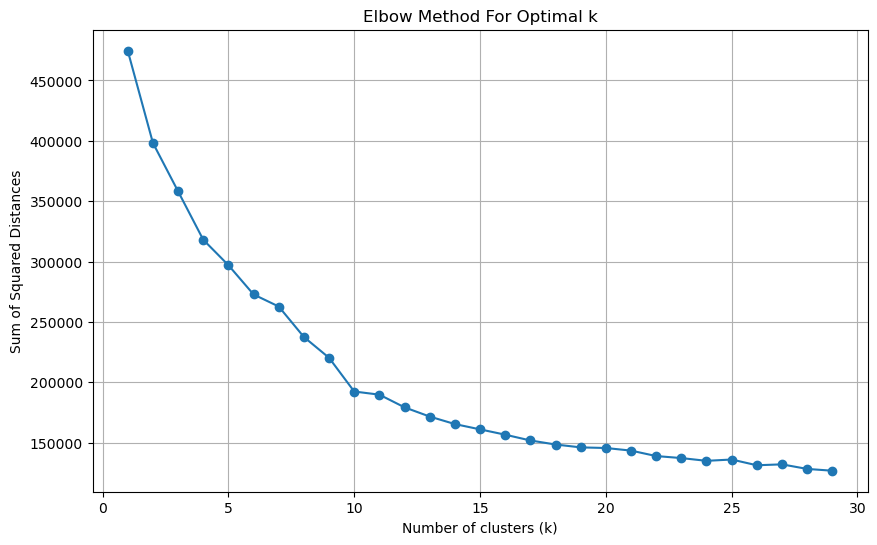

In [12]:
list_k = list(range(1, 30))
sum_of_squared_distances = []

for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    # Append the sum of squared distances to the list
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(list_k, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()



In [24]:
optimal_n_clusters = 12

# Apply KMeans with the optimized number of clusters
model = KMeans(n_clusters=optimal_n_clusters)
model.fit(features)


cluster_labels = model.labels_


user_profile_df['cluster'] = cluster_labels


user_profile_df['cluster'].value_counts()


cluster
1     9386
2     5610
3     4237
7     3074
0     2830
11    2553
5     2297
9     2069
8      835
4      566
10     424
6       20
Name: count, dtype: int64

In [28]:
labels_df = pd.DataFrame(cluster_labels)
cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
# Rename columns to 'user' and 'cluster'
cluster_df.columns = ['user', 'cluster']
cluster_df

,user,cluster
0,2,10
1,4,8
2,5,10
3,7,1
4,8,1
...,...,...
33896,2102054,5
33897,2102356,1
33898,2102680,2
33899,2102983,1


### Apply PCA on user profile feature vectors to reduce dimensions

In [31]:
from sklearn.decomposition import PCA

# Initialize an empty list to store accumulated variance ratios
accumulated_variance_ratios = []

# Define a range of candidate values for n_components
candidate_components = range(1, 15)

# Iterate over each candidate value of n_components
for n_components in candidate_components:
    # Initialize PCA with the current value of n_components
    pca = PCA(n_components=n_components)
    # Fit PCA to the features and transform them
    transformed_features = pca.fit_transform(features)
    # Calculate the accumulated variance ratio
    accumulated_variance_ratio = np.sum(pca.explained_variance_ratio_)
    # Append the accumulated variance ratio to the list
    accumulated_variance_ratios.append(accumulated_variance_ratio)

# Find the smallest n_components value for which accumulated variance ratio >= 0.9
optimal_n_components = next(n for n, ratio in zip(candidate_components, accumulated_variance_ratios) if ratio >= 0.9)

print("Optimized n_components:", optimal_n_components)

Optimized n_components: 9


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23820\539228528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = candidate_components, y = accumulated_variance_ratios, palette='Set3')


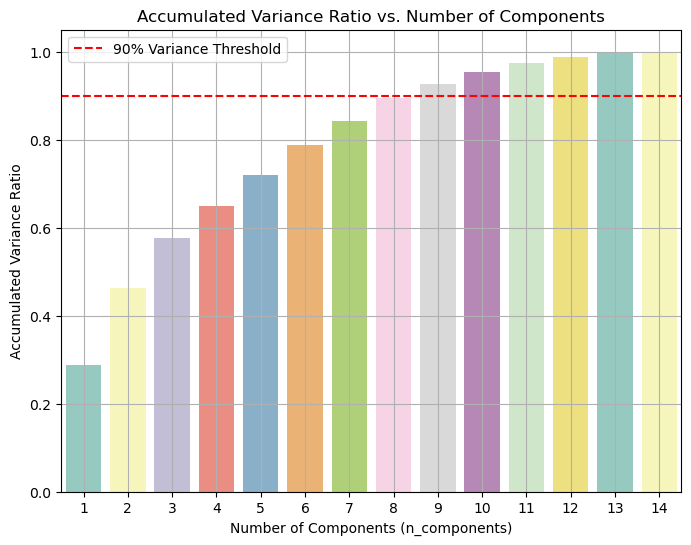

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x = candidate_components, y = accumulated_variance_ratios, palette='Set3')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')  # Add a horizontal line at 90%
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Accumulated Variance Ratio')
plt.title('Accumulated Variance Ratio vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
n_components = 9
pca = PCA(n_components=n_components)
# Fit PCA to the features and transform them
transformed_features = pca.fit_transform(features)
transformed_features = pd.DataFrame(transformed_features)
transformed_features

,0,1,2,3,4,5,6,7,8
0,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272
1,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405
2,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639
3,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887
4,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379
...,...,...,...,...,...,...,...,...,...
33896,0.633824,0.108815,-0.388871,-0.122665,-0.098364,0.358333,1.752049,1.486542,-0.523600
33897,-2.095339,0.135058,0.244727,-0.088185,0.025081,0.183641,0.046413,0.191709,0.260437
33898,0.625943,-0.547167,-1.692824,-0.630589,0.166632,0.676244,-0.055100,0.582091,1.703193
33899,-2.036832,-0.153534,0.162852,0.082651,-0.126419,0.255109,0.072496,0.113750,0.622900


array([[17.77249439,  0.20068141,  1.73060927, ...,  0.681042  ,
         2.31261304,  0.86827151],
       [ 7.14519863, -2.84748121,  2.3586356 , ...,  0.54976933,
         0.46903346,  0.03340487],
       [11.36326985,  1.8736192 , -1.52207738, ...,  1.67758234,
         2.9376687 ,  2.09763858],
       ...,
       [ 0.62594328, -0.54716673, -1.69282423, ..., -0.05509971,
         0.58209105,  1.70319253],
       [-2.03683187, -0.15353383,  0.16285226, ...,  0.07249638,
         0.11374975,  0.62289958],
       [-2.03683187, -0.15353383,  0.16285226, ...,  0.07249638,
         0.11374975,  0.62289958]])

In [61]:
a = pd.DataFrame(transformed_features)
a

,0,1,2,3,4,5,6,7,8
0,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272
1,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405
2,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639
3,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887
4,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379
...,...,...,...,...,...,...,...,...,...
33896,0.633824,0.108815,-0.388871,-0.122665,-0.098364,0.358333,1.752049,1.486542,-0.523600
33897,-2.095339,0.135058,0.244727,-0.088185,0.025081,0.183641,0.046413,0.191709,0.260437
33898,0.625943,-0.547167,-1.692824,-0.630589,0.166632,0.676244,-0.055100,0.582091,1.703193
33899,-2.036832,-0.153534,0.162852,0.082651,-0.126419,0.255109,0.072496,0.113750,0.622900


In [67]:
optimal_n_clusters = 12

# Apply KMeans with the optimized number of clusters
model = KMeans(n_clusters=optimal_n_clusters)
model.fit(features)


cluster_labels = model.labels_


user_profile_df['cluster'] = cluster_labels


user_profile_df['cluster'].value_counts()


cluster
0     10283
1      5211
11     4097
8      2958
9      2915
2      2838
4      2663
3      1388
7       571
10      564
5       393
6        20
Name: count, dtype: int64

In [69]:
labels_df = pd.DataFrame(cluster_labels)
cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
# Rename columns to 'user' and 'cluster'
cluster_df.columns = ['user', 'cluster']
cluster_df

,user,cluster
0,2,5
1,4,10
2,5,5
3,7,0
4,8,0
...,...,...
33896,2102054,4
33897,2102356,0
33898,2102680,1
33899,2102983,0


### Generate course recommendations based on the popular courses in the same cluster


In [98]:
users_df = pd.read_csv("users.csv", index_col=0)[['user' , 'item']]
users_df

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN
...,...,...
233301,1540125,DS0101EN
233302,1250651,PY0101EN
233303,1003832,CB0105ENv1
233304,922065,BD0141EN


In [102]:
users_cluster_df = pd.merge(users_df, cluster_df, left_on='user', right_on='user') 
users_cluster_df

,user,item,cluster
0,1889878,CC0101EN,5
1,1342067,CL0101EN,11
2,1990814,ML0120ENv3,10
3,380098,BD0211EN,5
4,779563,DS0101EN,1
...,...,...,...
233301,1540125,DS0101EN,11
233302,1250651,PY0101EN,1
233303,1003832,CB0105ENv1,2
233304,922065,BD0141EN,10


In [112]:
courses_cluster = users_cluster_df[['item', 'cluster']]
courses_cluster

,item,cluster
0,CC0101EN,5
1,CL0101EN,11
2,ML0120ENv3,10
3,BD0211EN,5
4,DS0101EN,1
...,...,...
233301,DS0101EN,11
233302,PY0101EN,1
233303,CB0105ENv1,2
233304,BD0141EN,10


In [118]:
courses_cluster['count'] = [1] * len(courses_cluster)
courses_cluster_grouped = courses_cluster.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()
courses_cluster_grouped

,cluster,item,enrollments
0,0,AI0111EN,27
1,0,BC0201EN,952
2,0,BD0101EN,1271
3,0,BD0111EN,615
4,0,BD0115EN,57
...,...,...,...
1245,11,TA0105EN,67
1246,11,TA0106EN,35
1247,11,TMP0105EN,57
1248,11,WA0101EN,252


In [124]:
def generate_course_recommendations(test_users_labelled, courses_cluster_grouped, enrollment_threshold=10):
    
    recommendations = {}

    # Iterate through each test user
    for user_id in test_users_labelled['user'].unique():
        # Filter the DataFrame to get information about the current user
        user_subset = test_users_labelled[test_users_labelled['user'] == user_id]
        
        # Get the enrolled courses of the current user
        enrolled_courses = set(user_subset['item'])
        
        # Get the cluster label of the current user (assuming all entries have the same cluster label for a user)
        cluster_id = user_subset['cluster'].iloc[0]
        
        # Get all courses belonging to the same cluster as the current user
        cluster_courses = set(courses_cluster_grouped[courses_cluster_grouped['cluster'] == cluster_id]['item'])
        
        # Find new/unseen courses to the user by taking a set difference
        unseen_courses = cluster_courses.difference(enrolled_courses)
        
        # Filter popular courses among unseen courses based on enrollment threshold
        popular_unseen_courses = set(courses_cluster_grouped[
            (courses_cluster_grouped['cluster'] == cluster_id) & 
            (courses_cluster_grouped['item'].isin(unseen_courses)) & 
            (courses_cluster_grouped['enrollments'] >= enrollment_threshold)
        ]['item'])
        
        # Add the recommended courses to the dictionary
        recommendations[user_id] = popular_unseen_courses
    
    return recommendations

In [142]:
recommendations = generate_course_recommendations(users_cluster_df, courses_cluster_grouped)
recommendations = pd.DataFrame(list(recommendations.items()), columns=['User', 'Courses'])
recommendations

,User,Courses
0,1889878,"{ML0101EN, RP0103EN, SC0103EN, TMP0105EN, DS02..."
1,1342067,"{ML0101EN, SC0103EN, DE0205EN, TMP0105EN, DS02..."
2,1990814,"{ML0101EN, RP0103EN, TMP0105EN, CC0101EN, ML01..."
3,380098,"{SC0103EN, TMP0105EN, DE0205EN, CC0101EN, DS02..."
4,779563,"{ML0101EN, RP0103EN, DE0205EN, CC0101EN, SC010..."
...,...,...
33896,1525198,"{ML0101EN, TMP0105EN, DE0205EN, BD0115EN, DS03..."
33897,1047293,"{ML0101EN, TMP0105EN, DE0205EN, BD0115EN, DS03..."
33898,1653442,"{ML0101EN, TMP0105EN, DE0205EN, BD0115EN, DS03..."
33899,946438,"{ML0101EN, TMP0105EN, DE0205EN, BD0115EN, DS03..."


### Recommended Courses for a given User 

In [147]:
user_id = 2
recommended_courses = []
for x in recommendations[recommendations["User"] == user_id]["Courses"]:
    recommended_courses.extend(x)
course_df = pd.read_csv("courses.csv", index_col=0)
recommended_courses = course_df[course_df['COURSE_ID'].isin(recommended_courses)].reset_index()
print(f"Recommended Courses of User \033[1m{user_id}\033[0m:")
recommended_courses

Recommended Courses of User 2:


,index,COURSE_ID,TITLE,DESCRIPTION
0,0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,5,CNSC02EN,cloud native security conference data security,introduction to data security on cloud
2,11,CC0271EN,cloud pak for integration essentials,in this short course you will demonstrate the...
3,15,DAI101EN,data ai essentials,data and ai essentials course
4,19,HCC105EN,hybrid cloud conference ai pipelines lab,hybrid cloud conference ai pipelines lab
5,20,DE0205EN,dataops methodology,data ops course
6,23,DS0201EN,end to end data science on cloudpak for data,end to end data science on cloudpak for data
7,25,CC0210EN,serverless computing using cloud functions d...,this course is designed to teach you serverles...
8,27,HCC104EN,hybrid cloud conference serverless lab,hybrid cloud conference serverless lab
9,33,PHPM002EN,php web application on a lamp stack,this tutorial walks you through the creation o...
